*Supporting textbook chapters for week 1: 2, 3 and 4.3*

# Example 1

Suppose the problem is to find the number of radioactive atoms of uranium $N$ as a function of time given initial $N_0$ and
$$\frac{dN}{dt} = -\frac{N}{\tau}.$$
($\tau =$ decay constant), using Euler method for integration, for a duration of $5\tau$.

In [15]:
# Pseudocode:
# DEFINE decay constant tau, initial N0, duration, timestep, number of integration points nvals
# SET duration = 5tau
# SET nvals = 1001
# INITIALIZE N_array with zeros, first value = N0
# INITIALIZE time_array with nvals equally-spaced values between 0 and duration
# COMPUTE timestep dt = time_array spacing
# FOR 100 iterations:
#     COMPUTE next value of N_array: CALL Decay using current value, timestep, tau
# PLOT N_array vs. time_array

In [1]:
""" Code that computes the number of radioactive atoms of uranium N
as function of time, given tau and N0 and using Euler method. """

# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Decay(previous, timestep, lifetime):
    return (previous - timestep * previous / lifetime)

In [6]:
# Define decay constant tau, initial N0, and duration
tau = 6.446e9  # [s] tau for U238
N0 = 1e6  # [1] initial N
duration = 5.*tau  # [s] the end of the simulation time
# Initialize time array
nvals = 11
time = np.linspace(0., duration, nvals)
# Compute dt the time step
dt = time[1] - time[0]
# Initialize a number array with same number of elements
N = 0*time
N[0] = N0

In [7]:
# 5. FOR nvals iterations:
#        Increment the N array with Euler: N[i+1] = N[i] - dt*N[i]/tau
for ii in range(nvals-1):
    N[ii+1] = Decay(N[ii], dt, tau)

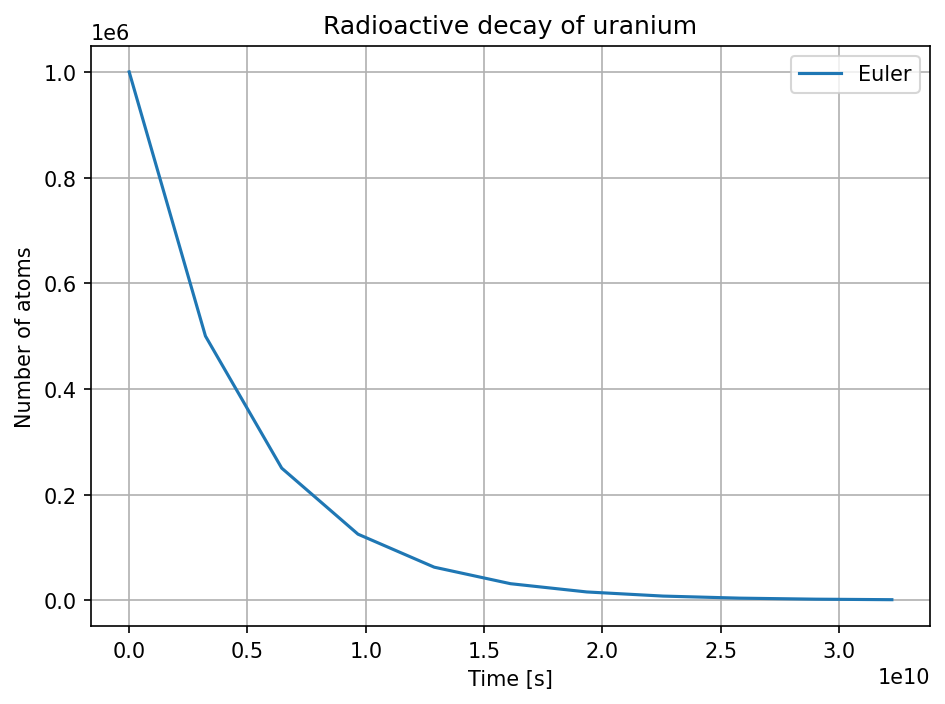

In [8]:
# 6. Plot N vs. t
plt.figure(dpi=150)
plt.plot(time, N, label='Euler')
plt.title('Radioactive decay of uranium')
plt.xlabel('Time [s]')
plt.ylabel('Number of atoms')
# plt.plot(time, N0*np.exp(-time/tau), '--', label
plt.grid()
plt.legend()
plt.tight_layout()

# Example 2

Given position $x(t)$ of a particle undergoing SHO with angular frequecy 0.5 rad/s, initial position 3 m, initial velocity 0 m/s, calculate velocity and acceleration using simple finite difference

In [46]:
# Pseudocode:
# DEFINE angular frequency omega, amplitude A
# SET duration = 30 s
# SET nvals = 101
# INITIALIZE time_array with nvals equally-spaced values between 0 and duration
# INITIALIZE position_array with nvals entries
# INITIALIZE velocity_array with nvals-1 zeros
# INITIALIZE acceleration_array with nvals-2 zeros
# COMPUTE position_array values: A*cos(omega*t)
# FOR nvals-1 iterations:
#     COMPUTE next value of velocity_array: finite difference using position_array, time_array
# FOR nvals-2 iterations:
#     COMPUTE next value of acceleration_array: finite difference using velocity_array, time_array
# PLOT x_array, velocity_array, acceleration_array vs. time_array

In [27]:
# import numpy as np  
# import matplotlib.pyplot as plt

In [15]:
# Define parameters
omega = 0.5  # [rad/s] angular frequency
A = 3.  # [m] displacement amplitude
# discretize time
endtime = 30. # [s] duration of simulation
N = 10 # number of time points
t = np.linspace(0, endtime, N) 
# arrays of dependent variables: positions, velocities, accelerations
x = np.empty(N)  
v = np.empty(N-1) 
a = np.empty(N-2)  

In [10]:
# operation for finite difference algorithm
def finite_diff(val1, val2, delta):
    return (val2 - val1) / delta

In [11]:
# Initialize: define signal on discretized grid
x = A*np.cos(omega*t)

In [16]:
# Define velocity using finite differences: v = Delta x/Delta t
dt = t[1] - t[0]
for k in range(N-1):
    v[k] = finite_diff (x[k], x[k+1], dt)

# Define acceleration using finite differences: a = Delta v/Delta t
for k in range(N-2):
    a[k] = finite_diff (v[k], v[k+1], dt)

In [33]:
# debug: print results
print("t is ", t)

t is  [ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3  3.6  3.9
  4.2  4.5  4.8  5.1  5.4  5.7  6.   6.3  6.6  6.9  7.2  7.5  7.8  8.1
  8.4  8.7  9.   9.3  9.6  9.9 10.2 10.5 10.8 11.1 11.4 11.7 12.  12.3
 12.6 12.9 13.2 13.5 13.8 14.1 14.4 14.7 15.  15.3 15.6 15.9 16.2 16.5
 16.8 17.1 17.4 17.7 18.  18.3 18.6 18.9 19.2 19.5 19.8 20.1 20.4 20.7
 21.  21.3 21.6 21.9 22.2 22.5 22.8 23.1 23.4 23.7 24.  24.3 24.6 24.9
 25.2 25.5 25.8 26.1 26.4 26.7 27.  27.3 27.6 27.9 28.2 28.5 28.8 29.1
 29.4 29.7 30. ]


In [34]:
print("x is ", x)

x is  [ 3.          2.96631323  2.86600947  2.70134131  2.47600684  2.19506661
  1.8648299   1.49271314  1.08707326  0.65702006  0.21221161 -0.23736267
 -0.68160628 -1.11054249 -1.51453831 -1.88452087 -2.21218115 -2.49016061
 -2.71221643 -2.87336171 -2.96997749 -2.99989398 -2.96243931 -2.85845464
 -2.69027525 -2.46167807 -2.17779691 -1.84500713 -1.47078246 -1.0635272
 -0.6323874  -0.18704554  0.26249695  0.70614433  1.13393323  1.53625643
  1.90407863  2.22913932  2.50413835  2.72289984  2.88051086  2.97343182
  2.99957591  2.95835599  2.85069778  2.67901903  2.4471753   2.16037329
  1.82505394  1.44874782  1.03990595  0.60771004  0.16186626 -0.28761268
 -0.73063246 -1.15724381 -1.55786596 -1.9235018  -2.24593994 -2.5179391
 -2.73339079 -2.8874564  -2.97667598 -2.99904582 -2.95406357 -2.84273941
 -2.66757346 -2.43249955 -2.14279696 -1.80497176 -1.42661078 -1.01621121
 -0.58298972 -0.13667554  0.31270808  0.75506895  1.1804726   1.57936538
  1.94278902  2.2625818   2.53156188  2.7436885

In [35]:
print("a is ", a) 

a is  [-0.74018889 -0.71515993 -0.67407002 -0.61784195 -0.54773849 -0.46533399
 -0.3724791  -0.27125913 -0.16394727 -0.0529535   0.05922949  0.17008231
  0.27711545  0.37792517  0.47024751  0.5520091   0.62137376  0.67678371
  0.71699455  0.74110324  0.74856835  0.73922223  0.71327476  0.67130869
  0.61426647  0.54342915  0.46038758  0.3670067   0.26538364  0.15780064
  0.04667377 -0.06550128 -0.17620533 -0.28295217 -0.38334453 -0.47512779
 -0.55624071 -0.62486165 -0.67944956 -0.71877849 -0.7419652  -0.74848898
 -0.73820331 -0.71133918 -0.66849991 -0.61064757 -0.53908141 -0.45540863
 -0.36150836 -0.2594894  -0.15164286 -0.04039075  0.07176845  0.18231589
  0.2887689   0.38873679  0.47997448  0.56043299  0.62830538  0.68206738
  0.72051162  0.74277472  0.74835671  0.73713221  0.70935332  0.66564388
  0.60698551  0.53469556  0.45039749  0.35598447  0.25357681  0.14547436
  0.03410487 -0.07803055 -0.18841356 -0.29456522 -0.39410157 -0.48478725
 -0.56458566 -0.63170469 -0.68463699 -0.72219

In [13]:
# plot results
def plot_results(t, x, v, a, N):
    plt.figure()

    plt.subplot(3, 1, 1)
    plt.plot(t, x)
    plt.title("SHO motion")
    plt.ylabel('x [m]')

    plt.subplot(3, 1, 2)
    plt.plot(t[:-1], v)
    plt.ylabel('v [m/s]')

    plt.subplot(3, 1, 3)
    plt.plot(t[:-2], a)
    plt.ylabel('a [m/s/s]')
    plt.xlabel('t [s]')

    plt.tight_layout()
    # plt.savefig('T01.pdf')  # saves a pdf figure on disk

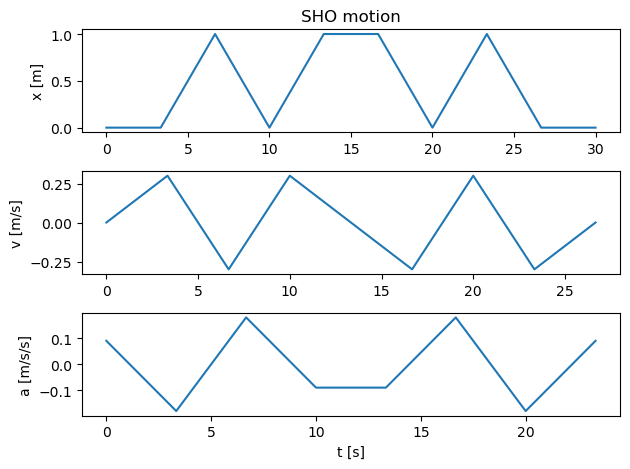

In [17]:
plot_results(t, x, v, a, N)

## Example 3

Read through Example 4.3 on pages 137-138 of the text, which  show you that to multiply two matrices of size $O(N)$ on a side takes $O(N^3)$ operations.
So multiplying matrices that are $N=1000$ on a side takes $O(10^9)$ operations (a ``GigaFLOP''). 

Create two constant matrices $A$ and $B$, then time how long it takes to multiply the matrices to form a matrix $C$ (using the code fragment in the textbook), for a range of $N$ (from $N = 2$ to a few hundred). Print out and plot this time as a function of $N$ and as a function of $N^3$.

Compare this time to the time it takes numpy.dot to carry out the same operation. What do you notice?
See http://tinyurl.com/pythondot for more explanations.

In [18]:
from time import time

In [24]:
size_max = 30  # the side size of the largest matrices we will multiply
N_array = np.arange(size_max)
duration_manual = np.empty(size_max)  # this array will contain durations for manual method
duration_dot = np.empty(size_max)  # same, but for the dot method
duration_manual[0:1] = 0.
duration_dot[0:1] = 0.

In [20]:
# matrix multiplication as in Example 4.3 of the book
def manualMatrixMultiply(A, B):
    N = len(A[0])
    C = np.empty((N, N))
    for i in range(N):  
            for j in range(N):
                for k in range(N):
                    C[i, j] = A[i, k] * B[k, j]
    return C

In [25]:
for N in range(2, size_max):
    #print('Size of matrices: ' + str(N))

    # initializing matrices: A and B with random numbers
    A = np.random.random((N, N)) 
    B = np.random.random((N, N))  

    start = time()  # initializing timer for manual method
    # matrix multiplication using manual method
    C = manualMatrixMultiply(A, B)
    end = time() # stopping timer
    duration_manual[N] = end - start
    
    start = time()  # initializing timer for dot product method
    # matrix multiplication using numpy method
    C = np.dot(A, B)
    end = time() # stopping timer for dot product method
    duration_dot[N] = (end - start)  # the duration for this method

In [22]:
# draw plots: duration as a function of N and N^3
def drawTimingFigure(N_array, durationsArray):
    plt.figure()  

    plt.subplot(211)  
    # durations as a function of N
    plt.plot(N_array, durationsArray)
    plt.xlabel('$N$, the size of the matrix')
    plt.title('avg time it takes to multiply [s]')
    plt.grid()

    plt.subplot(212)  
    # durations as a function of N**3
    plt.plot(N_array**3, durationsArray)
    plt.xlabel('$N^3$')
    plt.title('avg time it takes to multiply [s]')
    plt.grid()
    plt.tight_layout()

    #plt.savefig('timingPlot.png', dpi=300)  # dpi is for dots per inch

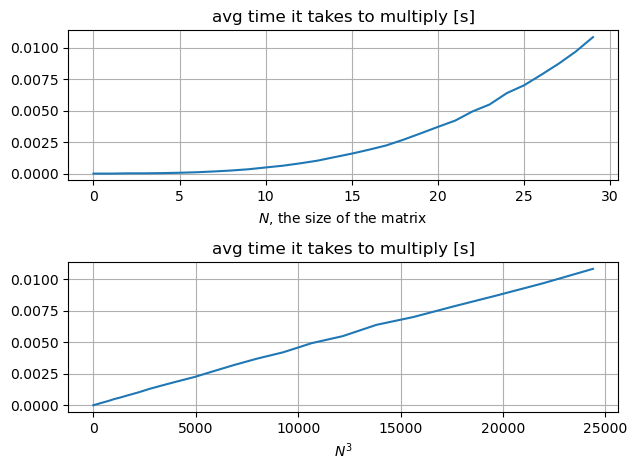

In [26]:
# this figure is for the manual method -----------------|
drawTimingFigure(N_array, duration_manual)

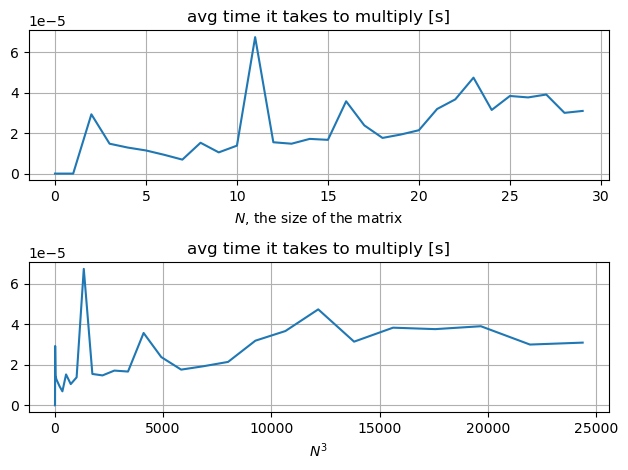

In [27]:
# this figure is for the fast ("dot") method -------------------|
drawTimingFigure(N_array, duration_dot)